## Customer Churn Prediction


## Import necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv(r"/content/Customer_data - customer_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


** Handling null values in Total Charges column

In [4]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

median_total_charges = df["TotalCharges"].median()

df["TotalCharges"] = df["TotalCharges"].fillna(median_total_charges)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
def check_unique_values(df):

  for column in df.columns:
    print(f"Column '{column}':")
    print(df[column].unique())
    print("-" * 30) # Separator for clarity

check_unique_values(df)



Column 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------
Column 'gender':
['Female' 'Male']
------------------------------
Column 'SeniorCitizen':
[0 1]
------------------------------
Column 'Partner':
['Yes' 'No']
------------------------------
Column 'Dependents':
['No' 'Yes']
------------------------------
Column 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------------------------
Column 'PhoneService':
['No' 'Yes']
------------------------------
Column 'MultipleLines':
['No phone service' 'No' 'Yes']
------------------------------
Column 'InternetService':
['DSL' 'Fiber optic' 'No']
------------------------------
Column 'OnlineSecurity':
['No' 'Yes' 'No internet service']
------------------------------
Column '

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Get a list of all columns except customerID
all_columns = [col for col in df.columns if col != 'customerID']

# First, create a copy of the dataframe with selected columns
df_processed = df[all_columns].copy()

# Columns for LabelEncoding (binary)
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Columns for OneHotEncoding - Include 'Contract' here
onehot_cols = [
    'MultipleLines', 'InternetService', 'PaymentMethod', 'TenureGroup', 'Contract'
]

# Columns that should be binary encoded (Yes/No) and then summed
binary_encode_for_sum = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Prepare a list to store all feature names
feature_names = []

# Apply LabelEncoder to binary columns including those for summing
le = LabelEncoder()
for col in label_cols + binary_encode_for_sum:
    # We will transform the columns that will be summed separately later
    if col in label_cols:
       df_processed[col] = le.fit_transform(df_processed[col])
       if col != 'Churn':  # Don't include target variable in features
           feature_names.append(col)

# A more robust way to ensure 'Yes' is 1 and 'No' is 0 for summing:
for col in binary_encode_for_sum:
    df_processed[col] = df_processed[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
    # Ensure the column is numeric after replacement
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').fillna(0)

# Calculate the sum of services
total_subs = df_processed[binary_encode_for_sum].sum(axis=1)
df_processed['TotalServices'] = total_subs

# OneHotEncode with ColumnTransformer
# Define the list of columns to be passed to the ColumnTransformer
cols_for_ohe = [col for col in df_processed.columns if col in onehot_cols]

# Ensure that 'Churn' is not included in the features used for transformation
cols_for_passthrough = [col for col in df_processed.columns
                       if col not in onehot_cols + binary_encode_for_sum + ['Churn']
                       and col != 'customerID']

# Create OneHotEncoder with feature names
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create ColumnTransformer with feature names
ct = ColumnTransformer([
    ('ohe', ohe, cols_for_ohe)
], remainder='passthrough')

# Now apply the transformation using the updated columns
X = df_processed[cols_for_ohe + cols_for_passthrough]
df_transformed_array = ct.fit_transform(X)

# Get feature names for one-hot encoded columns
ohe_feature_names = []
for i, col in enumerate(cols_for_ohe):
    categories = ct.named_transformers_['ohe'].categories_[i]
    for cat in categories:
        ohe_feature_names.append(f'{col}_{cat}')

# Add remaining feature names
all_feature_names = ohe_feature_names + cols_for_passthrough

# Convert transformed array to DataFrame with feature names
df_transformed = pd.DataFrame(df_transformed_array, columns=all_feature_names)

# Store the target variable separately
y = df_processed['Churn']



PhoneService unique values:
[0 1]

Columns with object dtype:
Column 'MultipleLines' has object dtype. Unique values: ['No phone service' 'No' 'Yes']
Column 'InternetService' has object dtype. Unique values: ['DSL' 'Fiber optic' 'No']
Column 'Contract' has object dtype. Unique values: ['Month-to-month' 'One year' 'Two year']
Column 'PaymentMethod' has object dtype. Unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


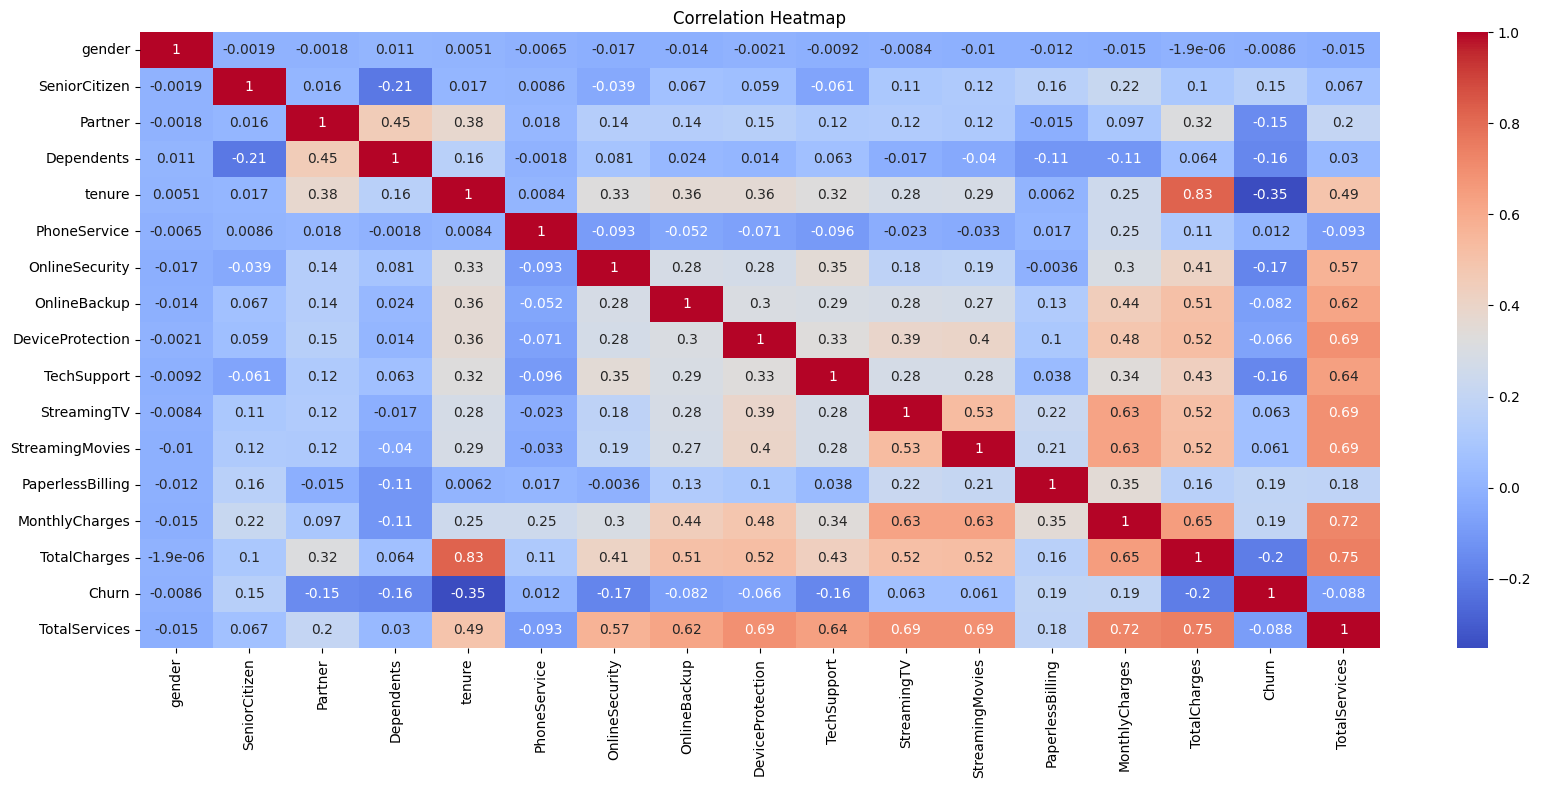

In [8]:
# Check the unique values of the 'PhoneService' column
print("PhoneService unique values:")
print(df_processed['PhoneService'].unique())

# Iterate through the columns and check their data types
print("\nColumns with object dtype:")
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        print(f"Column '{col}' has object dtype. Unique values: {df_processed[col].unique()}")

# Re-run the correlation calculation after ensuring all relevant columns are numeric
plt.figure(figsize=(20, 8))
sns.heatmap(df_processed.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

** Feature Engineering

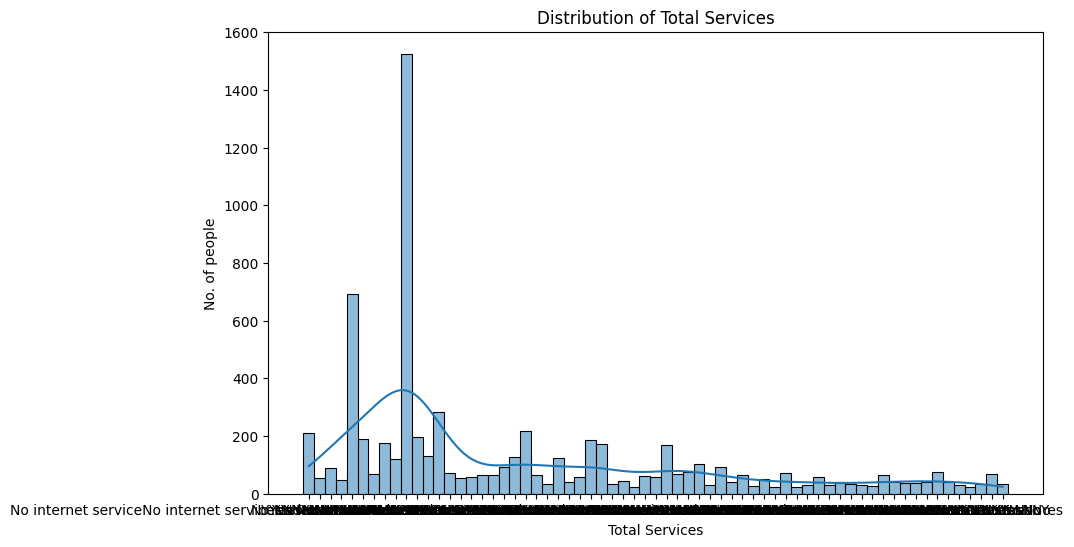

In [9]:
# Total services subscribed

total_subs = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].sum(axis=1)

df['TotalServices'] = total_subs


plt.figure(figsize=(10, 6))
sns.histplot(df['TotalServices'], bins=40, kde=True)
plt.title('Distribution of Total Services')
plt.xlabel('Total Services')
plt.ylabel('No. of people')
plt.show()


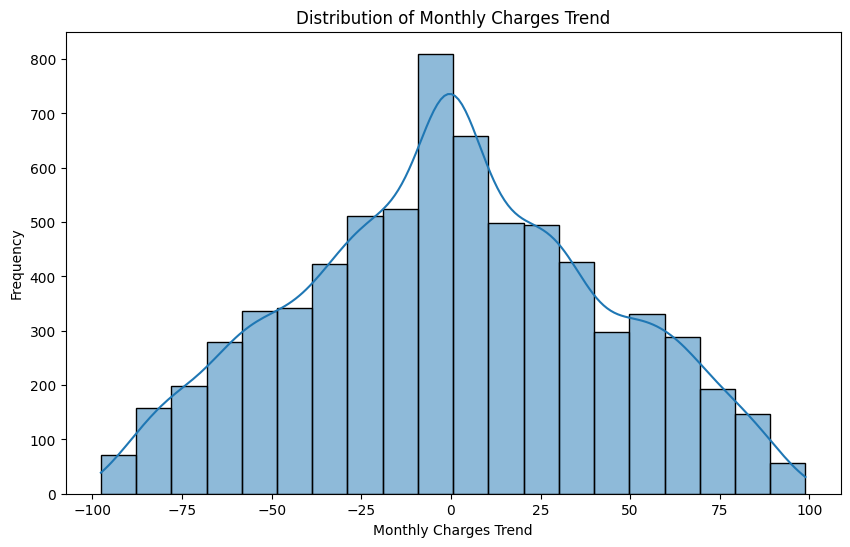

In [10]:
# Monthly charges trends

df['MonthlyChargesTrend'] = df['MonthlyCharges'] - df['MonthlyCharges'].shift(1)
df.fillna({'MonthlyChargesTrend': 0}, inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyChargesTrend'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges Trend')
plt.xlabel('Monthly Charges Trend')
plt.ylabel('Frequency')
plt.show()

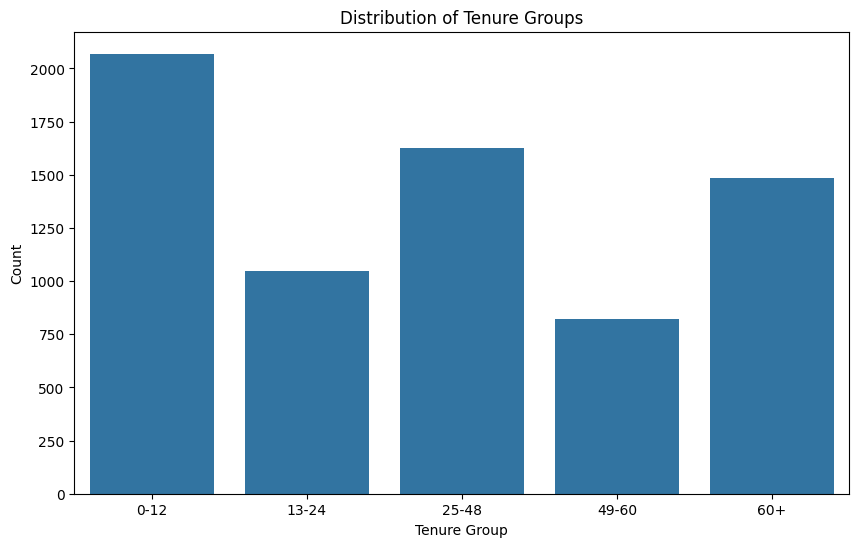

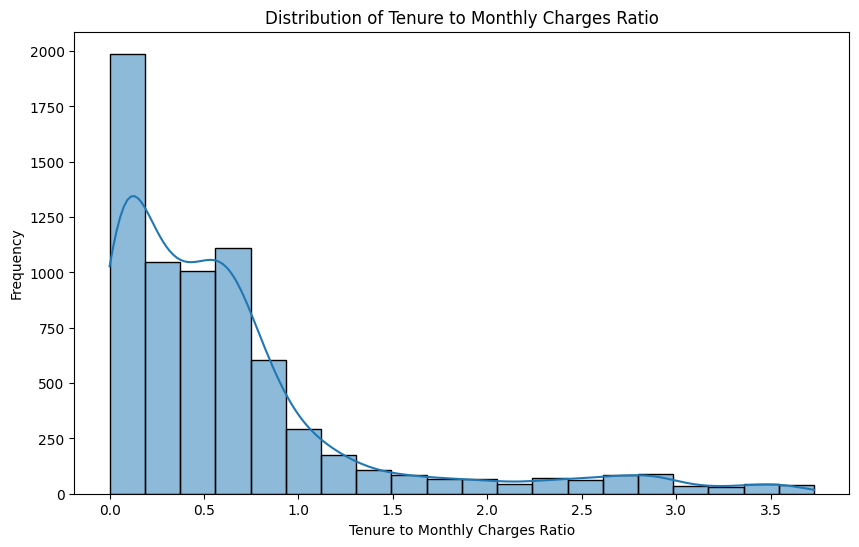

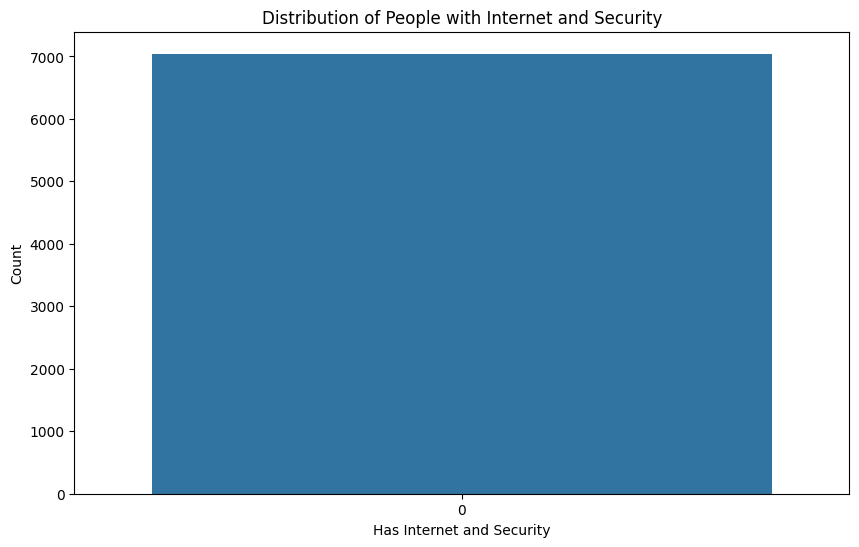

In [11]:
# implementation of Tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf],
                           labels=['0-12', '13-24', '25-48', '49-60', '60+'], right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TenureGroup')
plt.title('Distribution of Tenure Groups')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()

# implementation of Tenure to Monthly Charges ratio
df['TenureMonthlyChargeRatio'] = df['tenure'] / df['MonthlyCharges']
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Handle potential inf values
df['TenureMonthlyChargeRatio'].fillna(0, inplace=True) # Fill resulting NaNs

plt.figure(figsize=(10, 6))
sns.histplot(df['TenureMonthlyChargeRatio'], bins=20, kde=True)
plt.title('Distribution of Tenure to Monthly Charges Ratio')
plt.xlabel('Tenure to Monthly Charges Ratio')
plt.ylabel('Frequency')

# implementation of interaction feature
df['HasInternetAndSecurity'] = ((df['InternetService'] != 'No internet service') & (df['OnlineSecurity'] == 1)).astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HasInternetAndSecurity')
plt.title('Distribution of People with Internet and Security')
plt.xlabel('Has Internet and Security')
plt.ylabel('Count')
plt.show()


## Splitting data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split


X = df_transformed_array # Or your processed feature data
y = df_processed['Churn'] # Your target variable

# Split into training and temporary test sets (e.g., 80% train, 20% temp_test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary test set into validation and final test sets (e.g., 50% val, 50% test of the temp set)
# This results in 10% validation and 10% test of the original data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 5634
Validation set size: 704
Test set size: 705


## Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test) # Also scale the test set for later evaluation

## Trying different Classification Models

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Increased max_iter to address potential convergence issues
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_val_scaled)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42) # Added random_state for reproducibility
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_val_scaled)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_val_scaled)

# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm = SVC(random_state=42) # Added random_state for reproducibility
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_val_scaled)

# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42) # Added random_state for reproducibility
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_val_scaled)

# K-Nearest Neighbour (Keeping the one you had before)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_val_scaled)

# You can now evaluate the performance of these models using their predictions on the validation set (e.g., using metrics like accuracy, precision, recall, F1-score).

## Evaluating the above models

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Logistic Regression Predictions:")
print("Accuracy:", lr.score(X_val_scaled, y_val))
print("Precision:", precision_score(y_val, lr_preds))
print("Recall:", recall_score(y_val, lr_preds))
print("F1 Score:", f1_score(y_val, lr_preds))
print("-" * 50)

print("Random Forest Predictions:")
print("Accuracy:", rf.score(X_val_scaled, y_val))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall:", recall_score(y_val, rf_preds))
print("F1 Score:", f1_score(y_val, rf_preds))
print("-" * 50)

print("Decision Tree Predictions:")
print("Accuracy:", dt.score(X_val_scaled, y_val))
print("Precision:", precision_score(y_val, dt_preds))
print("Recall:", recall_score(y_val, dt_preds))
print("-" * 50)

print("Support Vector Machine Predictions:")
print("F1 Score:", f1_score(y_val, svm_preds))
print("-" * 50)

print("XGBoost Predictions:")
print("Accuracy:", xgb.score(X_val_scaled, y_val))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall:", recall_score(y_val, xgb_preds))
print("F1 Score:", f1_score(y_val, xgb_preds))
print("-" * 50)

print("K-Nearest Neighbour Predictions:")
print("Accuracy:", knn.score(X_val_scaled, y_val))
print("Precision:", precision_score(y_val, knn_preds))
print("Recall:", recall_score(y_val, knn_preds))
print("F1 Score:", f1_score(y_val, knn_preds))
print("-" * 50)


Logistic Regression Predictions:
Accuracy: 0.8096590909090909
Precision: 0.6666666666666666
Recall: 0.5668449197860963
F1 Score: 0.6127167630057804
--------------------------------------------------
Random Forest Predictions:
Accuracy: 0.7911931818181818
Precision: 0.6470588235294118
Recall: 0.47058823529411764
F1 Score: 0.544891640866873
--------------------------------------------------
Decision Tree Predictions:
Accuracy: 0.7357954545454546
Precision: 0.503030303030303
Recall: 0.44385026737967914
--------------------------------------------------
Support Vector Machine Predictions:
F1 Score: 0.5781710914454278
--------------------------------------------------
XGBoost Predictions:
Accuracy: 0.8039772727272727
Precision: 0.6788321167883211
Recall: 0.49732620320855614
F1 Score: 0.5740740740740741
--------------------------------------------------
K-Nearest Neighbour Predictions:
Accuracy: 0.7727272727272727
Precision: 0.5906040268456376
Recall: 0.47058823529411764
F1 Score: 0.52380952

## Hyperparameter Training

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hyperparameter Training for Logistic Regression
print("Hyperparameter tuning for Logistic Regression...")
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best validation accuracy for Logistic Regression:", grid_search_lr.best_score_)
print("-" * 50)

# Hyperparameter Training for Random Forest
print("Hyperparameter tuning for Random Forest...")
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best validation accuracy for Random Forest:", grid_search_rf.best_score_)
print("-" * 50)


# Hyperparameter Training for Decision Tree
print("Hyperparameter tuning for Decision Tree...")
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

best_dt = grid_search_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best validation accuracy for Decision Tree:", grid_search_dt.best_score_)
print("-" * 50)


# Hyperparameter Training for SVM
print("Hyperparameter tuning for SVM...")
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

best_svm = grid_search_svm.best_estimator_
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best validation accuracy for SVM:", grid_search_svm.best_score_)
print("-" * 50)


# Hyperparameter Training for XGBoost
print("Hyperparameter tuning for XGBoost...")
param_grid_xgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best validation accuracy for XGBoost:", grid_search_xgb.best_score_)
print("-" * 50)


# Hyperparameter Training for K-Nearest Neighbors
print("Hyperparameter tuning for K-Nearest Neighbors...")
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

best_knn = grid_search_knn.best_estimator_
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)
print("Best validation accuracy for K-Nearest Neighbors:", grid_search_knn.best_score_)
print("-" * 50)

Hyperparameter tuning for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}
Best validation accuracy for Logistic Regression: 0.8024493263209986
--------------------------------------------------
Hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best validation accuracy for Random Forest: 0.7994307337577088
--------------------------------------------------
Hyperparameter tuning for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best validation accuracy for Decision Tree: 0.7554137818537717
--------------------------------------------------
Hyperparameter tuning for SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best validation accuracy for SVM: 0.7951722692320422
--------------------------------------------------
Hyperparameter tuning for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Be

## Model evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "XGBoost": best_xgb,
    "K-Nearest Neighbors": best_knn
}

for name, model in models.items():
    print(f"Evaluating {name}:")

    # Make predictions
    y_pred = model.predict(X_val_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # For ROC-AUC, we need predicted probabilities
    # Check if the model has a predict_proba method
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        print(f"  ROC-AUC: {roc_auc:.4f}")
    elif hasattr(model, "decision_function"):
        # For SVM with 'linear' kernel, decision_function can be used
        y_pred_decision = model.decision_function(X_val_scaled)
        roc_auc = roc_auc_score(y_val, y_pred_decision)
        print(f"  ROC-AUC: {roc_auc:.4f}")
    else:
        print("  ROC-AUC: Not applicable (model does not support probability or decision function)")


    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")


    # Optional: Print classification report and confusion matrix for more detail
    print("\n  Classification Report:")
    print(classification_report(y_val, y_pred))

    print("\n  Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    print("-" * 50)

Evaluating Logistic Regression:
  ROC-AUC: 0.8518
  Accuracy: 0.8097
  Precision: 0.6667
  Recall: 0.5668
  F1 Score: 0.6127

  Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       517
           1       0.67      0.57      0.61       187

    accuracy                           0.81       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.80      0.81      0.80       704


  Confusion Matrix:
[[464  53]
 [ 81 106]]
--------------------------------------------------
Evaluating Random Forest:
  ROC-AUC: 0.8474
  Accuracy: 0.8125
  Precision: 0.6871
  Recall: 0.5401
  F1 Score: 0.6048

  Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       517
           1       0.69      0.54      0.60       187

    accuracy                           0.81       704
   macro avg       0.77      0.73      0.74       704
weighted a

## Confusion matrix plot for all models

Evaluating Logistic Regression:


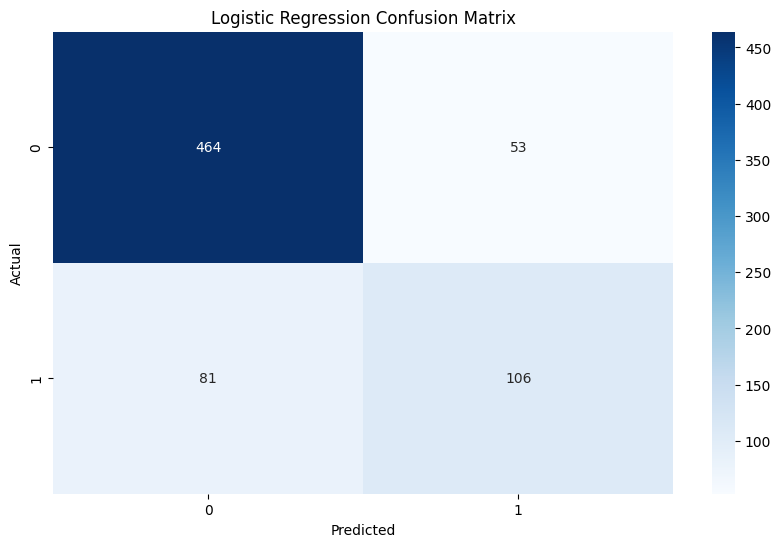

--------------------------------------------------
Evaluating Random Forest:


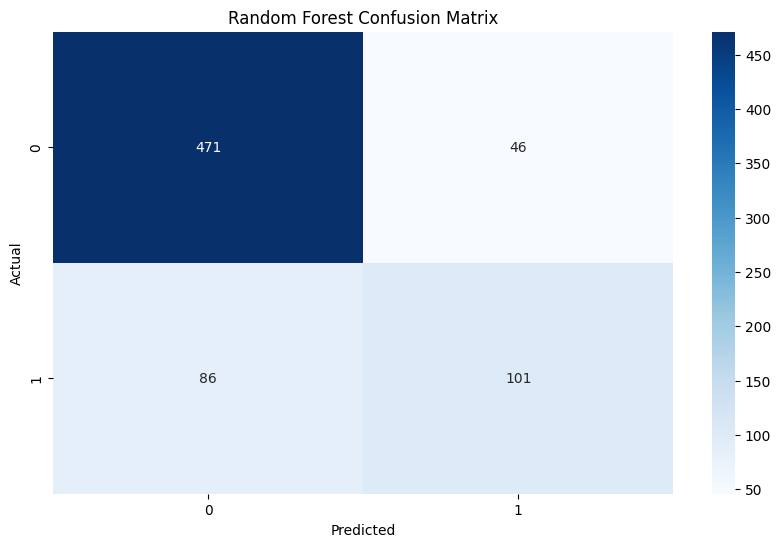

--------------------------------------------------
Evaluating Decision Tree:


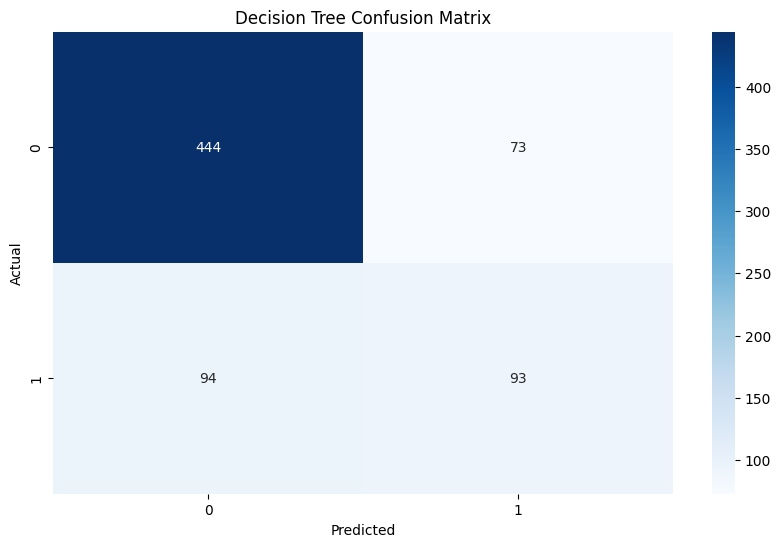

--------------------------------------------------
Evaluating SVM:


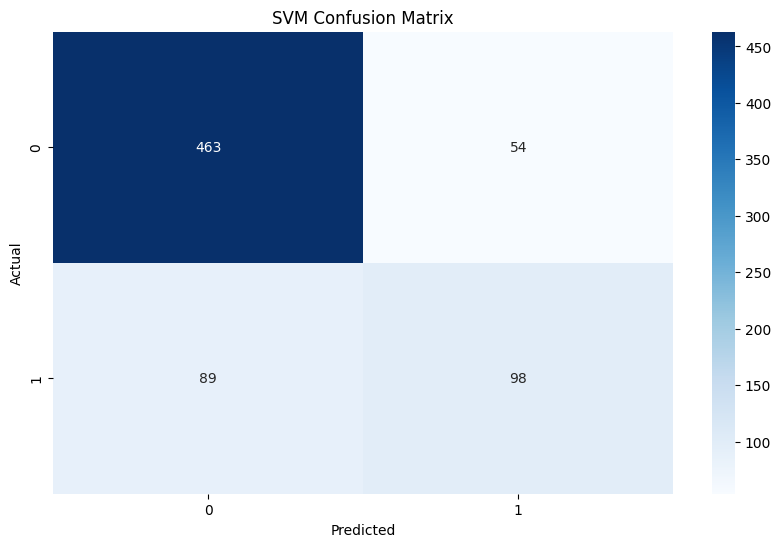

--------------------------------------------------
Evaluating XGBoost:


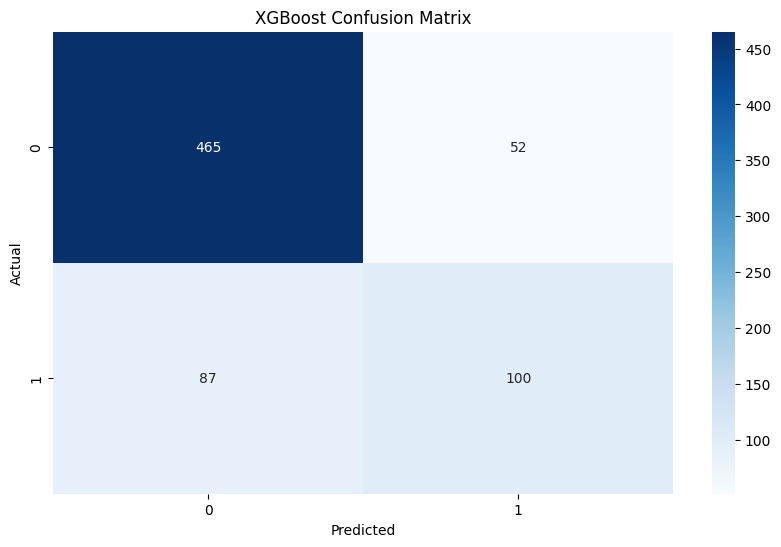

--------------------------------------------------
Evaluating K-Nearest Neighbors:


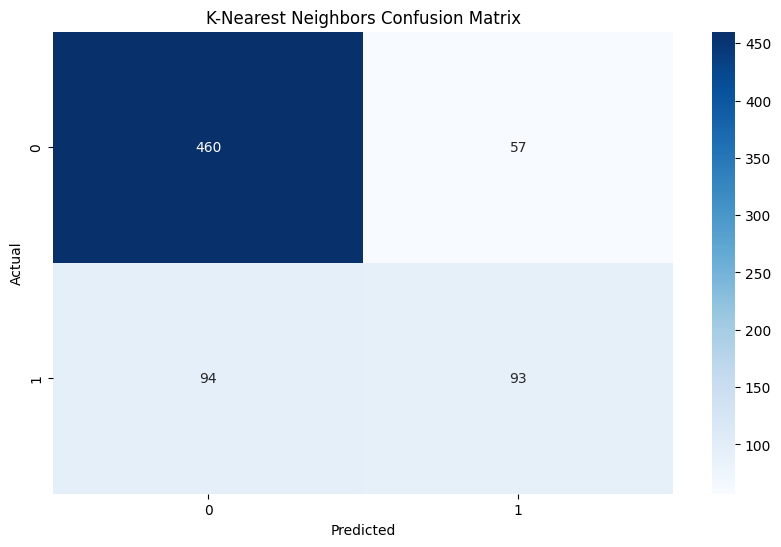

--------------------------------------------------


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "XGBoost": best_xgb,
    "K-Nearest Neighbors": best_knn
}

for name, model in models.items():
    print(f"Evaluating {name}:")

    # Make predictions
    y_pred = model.predict(X_val_scaled)

    # Calculate metrics (as before)
    # ...

    # Plot confusion matrix for the current model
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() # Display the plot for the current model

    print("-" * 50)

### ROC curve

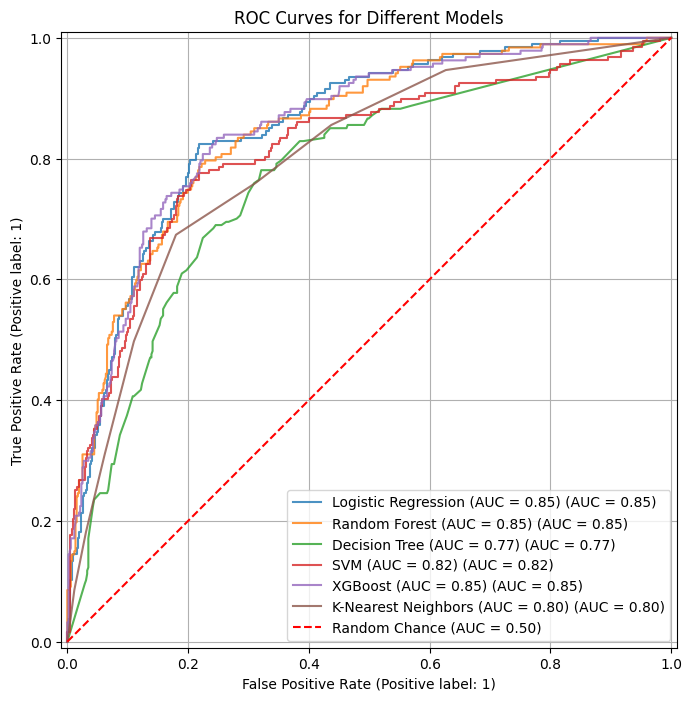

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "XGBoost": best_xgb,
    "K-Nearest Neighbors": best_knn
}

ax = plt.gca() # Get the current axes for plotting

for name, model in models.items():
    # Check if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        RocCurveDisplay.from_estimator(model, X_val_scaled, y_val, name=f'{name} (AUC = {roc_auc:.2f})', ax=ax, alpha=0.8)

    elif hasattr(model, "decision_function"):
        # For SVM with 'linear' kernel, decision_function can be used
        y_pred_decision = model.decision_function(X_val_scaled)
        fpr, tpr, _ = roc_curve(y_val, y_pred_decision)
        roc_auc = roc_auc_score(y_val, y_pred_decision)
        RocCurveDisplay.from_estimator(model, X_val_scaled, y_val, name=f'{name} (AUC = {roc_auc:.2f})', ax=ax, alpha=0.8)


# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance (AUC = 0.50)')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SHAP analysis

In [20]:
# pip install -q shap

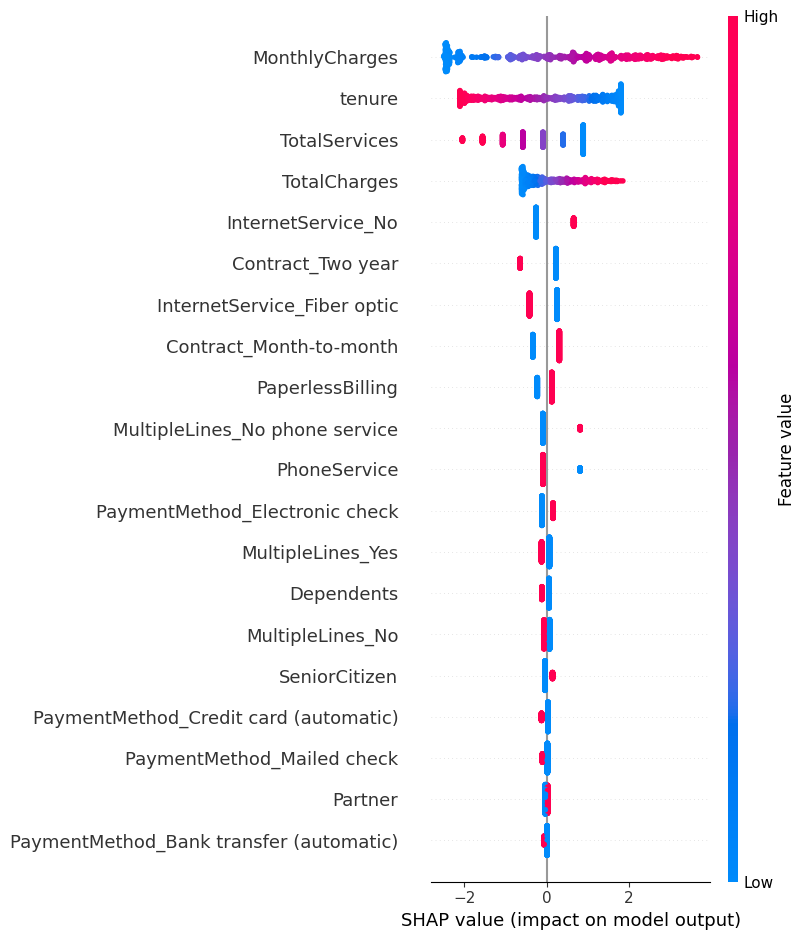

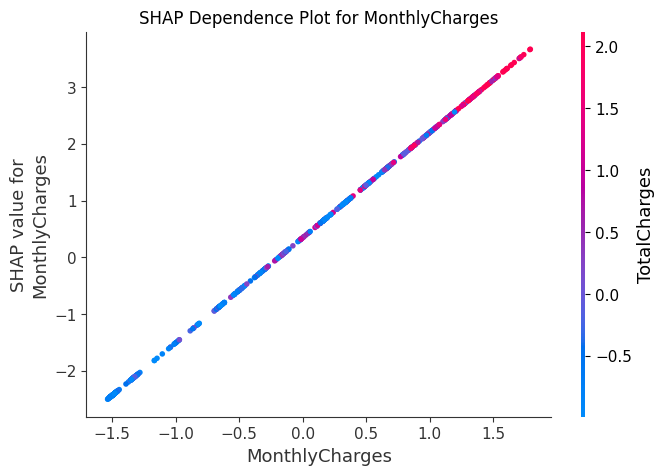

In [21]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

# Your best Logistic Regression model
model_for_shap = best_lr

# Create a SHAP explainer for the Logistic Regression model
# Use a small sample of the training data as the background
background_data = shap.sample(X_train_scaled, 50)

explainer = shap.LinearExplainer(model_for_shap, background_data)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val_scaled)

# SHAP summary plot with proper feature names
shap.summary_plot(shap_values, X_val_scaled, feature_names=all_feature_names)

# SHAP dependence plot for the most important feature
feature_importance = np.abs(shap_values).mean(axis=0)
most_important_feature_index = np.argmax(feature_importance)

shap.dependence_plot(
    most_important_feature_index,
    shap_values,
    X_val_scaled,
    feature_names=all_feature_names,
    show=False
)
plt.title(f'SHAP Dependence Plot for {all_feature_names[most_important_feature_index]}')
plt.show()

# SHAP force plot for a single instance
instance_index = 0  # Explaining the first instance in the validation set

# Create force plot with proper feature names
shap.force_plot(
    explainer.expected_value,
    shap_values[instance_index,:],
    X_val_scaled[instance_index,:],
    feature_names=all_feature_names
)

## Predicting Customer churn based on new dataset

In [ ]:
def predict_new_data(new_data):
    
    # Create a copy of the input data
    df_new = new_data.copy()

    # Get a list of all columns except customerID
    all_columns = [col for col in df_new.columns if col != 'customerID']

    # Process the new data the same way as training data
    df_processed_predict = df_new[all_columns].copy()

    # Apply Label Encoding to binary columns
    le = LabelEncoder()
    for col in label_cols:
        if col != 'Churn':  # Skip the target variable
            df_processed_predict[col] = le.fit_transform(df_processed_predict[col])

    # Process binary service columns
    for col in binary_encode_for_sum:
        df_processed_predict[col] = df_processed_predict[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
        df_processed_predict[col] = pd.to_numeric(df_processed_predict[col], errors='coerce').fillna(0)

    # Calculate total services
    df_processed_predict['TotalServices'] = df_processed_predict[binary_encode_for_sum].sum(axis=1)

    # Prepare columns for transformation
    X_new = df_processed_predict[cols_for_ohe + cols_for_passthrough]

    # Transform the new data using the fitted ColumnTransformer
    X_new_transformed = ct.transform(X_new)

    # Scale the transformed data
    X_new_scaled = scaler.transform(X_new_transformed)

    # Make predictions
    predictions = best_rf.predict(X_new_scaled)
    probabilities = best_rf.predict_proba(X_new_scaled)[:, 1]

    
      
# Create a new result dataframe with predictions and probabilities
    results = pd.DataFrame({
     'CustomerID': new_data['customerID'] if 'customerID' in new_data.columns else range(len(X_new_scaled)),
     'Churn_Prediction': ['Yes' if p == 1 else 'No' for p in predictions],
     'Churn_Probability': [f"{p:.2%}" for p in probabilities]
     })

     # Display results
    print("\nPrediction Results:")
    print("-" * 50)
    print(results)

# Print summary statistics
    print("\nSummary:")
    print(f"Total customers: {len(X_new_scaled)}")
    print(f"Predicted to churn: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.2f}%)")
    print(f"High-risk customers (>70% probability): {sum(probabilities > 0.7)}")

    return predictions, probabilities



### Enter the new dataset for prediction

In [ ]:

new_customer_data = pd.DataFrame("")  
predictions, probabilities = predict_new_data(new_customer_data)

## INSIGHTS

### 📊 SHAP Interpretation and Business Recommendations

#### 🔍 Who is Likely to Churn and Why?

Based on the SHAP analysis:

- **Customers with high `MonthlyCharges`** are more likely to churn. These customers contribute positively to the model output, increasing churn probability.
- **Customers with short `tenure`** (i.e., new customers) are also at high risk of leaving.
- **Customers using fewer services (`TotalServices`)** are more likely to churn, possibly due to lower engagement or value received.
- **Fiber optic internet users** have a higher churn tendency, possibly due to higher costs or service expectations.
- **Customers on month-to-month contracts** are significantly more likely to churn, showing a lack of long-term commitment.
- **Customers with low `TotalCharges` but high `MonthlyCharges`** are particularly high-risk — often new, high-paying customers who haven't yet built loyalty.

#### ✅ Interpretation of Results for Business Use

- The model strongly relies on `MonthlyCharges`, `tenure`, and `TotalServices` to predict churn.
- Customers who are paying more per month and have been with the company for a short time are more likely to leave.
- Service contract type and the number of subscribed services play a key role in retention.

#### 🛡️ Preventive Strategies

To reduce churn, the following actions are recommended:

- **Target new, high-paying customers** with personalized offers or onboarding support to improve early satisfaction.
- **Incentivize long-term contracts** for customers currently on month-to-month plans, such as discounts for committing to 1–2 year terms.
- **Bundle more services** or create value packages to increase `TotalServices` per customer, which is associated with reduced churn.
- **Investigate churn causes** for `Fiber optic` users — consider pricing adjustments, service improvements, or better communication of value.
- **Monitor low `TotalCharges` customers with high `MonthlyCharges`**, as they are likely new and feel cost-heavy early in the relationship.

By implementing these strategies, the business can proactively reduce churn risk and enhance customer retention.


## Video Link: